In [1]:
# 讀取/work/s6300121/LiveTransForM-main/metal/data/NIST_database_onlyMetal.csv檔案
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/work/s6300121/MetalGCN/data/NIST_database_onlyMetal.csv")
df.head()

,Metal ion,Ligand,Formula,Ligand class,Equilibrium,Temperature (C),Ionic strength,Value type,Value,Note,SMILES
0,Na⁺,Aminoacetic acid (Glycine),C2H5N1O2,Amino Acids,[ML]/[M][L],25,0.0,Log K,-0.60,NaN,NCC(O)=O
1,Na⁺,Aminoacetic acid (Glycine),C2H5N1O2,Amino Acids,[ML]/[M][L],25,0.1,Log K,-0.50,NaN,NCC(O)=O
2,Na⁺,Aminoacetic acid (Glycine),C2H5N1O2,Amino Acids,[ML]/[M][L],25,0.5,Log K,-0.40,NaN,NCC(O)=O
3,Mg²⁺,Aminoacetic acid (Glycine),C2H5N1O2,Amino Acids,[ML]/[M][L],25,0.1,Log K,1.66,NaN,NCC(O)=O
4,Mg²⁺,Aminoacetic acid (Glycine),C2H5N1O2,Amino Acids,[ML]/[M][L],25,0.5,Log K,1.34,NaN,NCC(O)=O


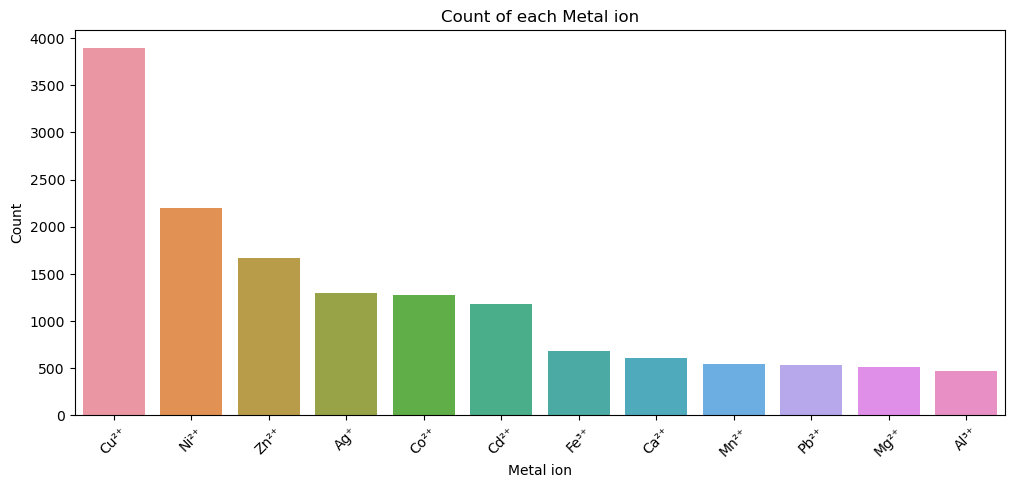

In [2]:
# 計算每個Metal ion的出現次數
ion_counts = df['Metal ion'].value_counts().reset_index()
ion_counts.columns = ['Metal ion', 'count']
# 使用 Seaborn 畫出 Bar Chart
plt.figure(figsize=(12,5))
sns.barplot(x='Metal ion', y='count', data=ion_counts[:12])
plt.xticks(rotation=45)  # 依需要調整 x 軸文字角度
plt.xlabel('Metal ion')
plt.ylabel('Count')
plt.title('Count of each Metal ion')
plt.show()

# 取前15個最常見的Metal ion
ion = df['Metal ion'].value_counts()
top_15_ions = ion.head(12)
# 獲取這15個Metal ion的名稱列表
top_15_metal_ions = top_15_ions.index.tolist()
# 過濾原始DataFrame，只保留這15種Metal ion的資料
f0_df = df[df['Metal ion'].isin(top_15_metal_ions)]
f1_df = f0_df[f0_df['Temperature (C)'] == 25] 
f2_df = f1_df[f1_df['Ionic strength'] == 0.1]
# 過濾出[ML]/[M][L], [ML₂]/[M][L]², [ML₃]/[M][L]³, [ML₄]/[M][L]⁴, [ML₅]/[M][L]⁵, [ML₆]/[M][L]⁶的資料
equilibrium_types = ['[ML]/[M][L]', '[ML₂]/[M][L]²', '[ML₃]/[M][L]³', '[ML₄]/[M][L]⁴', '[ML₅]/[M][L]⁵', '[ML₆]/[M][L]⁶']
f3_df = f2_df[f2_df['Equilibrium'].isin(equilibrium_types)]
f3_df.shape
# 輸出成CSV檔案
f3_df.to_csv("/work/s6300121/MetalGCN/data/Metal_t15_T25_I0.1_E3.csv", index=False)

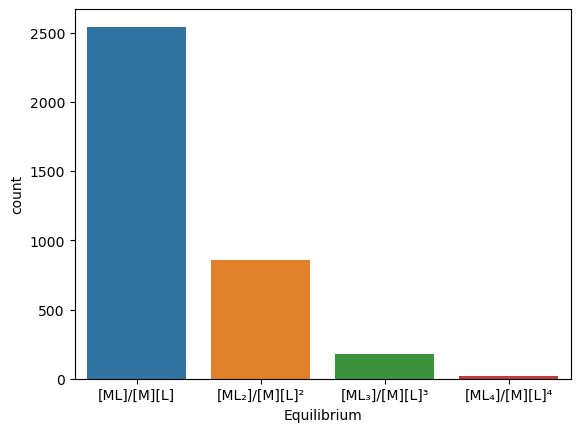

In [3]:
# plot出f3_df的Equilibrium的分布
sns.countplot(x='Equilibrium', data=f3_df)
plt.show()
# 計算每個Equilibrium的出現次數
equilibrium_counts = f3_df['Equilibrium'].value_counts().reset_index()
equilibrium_counts.columns = ['Equilibrium', 'count']


In [4]:
equilibrium_counts

,Equilibrium,count
0,[ML]/[M][L],2543
1,[ML₂]/[M][L]²,856
2,[ML₃]/[M][L]³,177
3,[ML₄]/[M][L]⁴,22


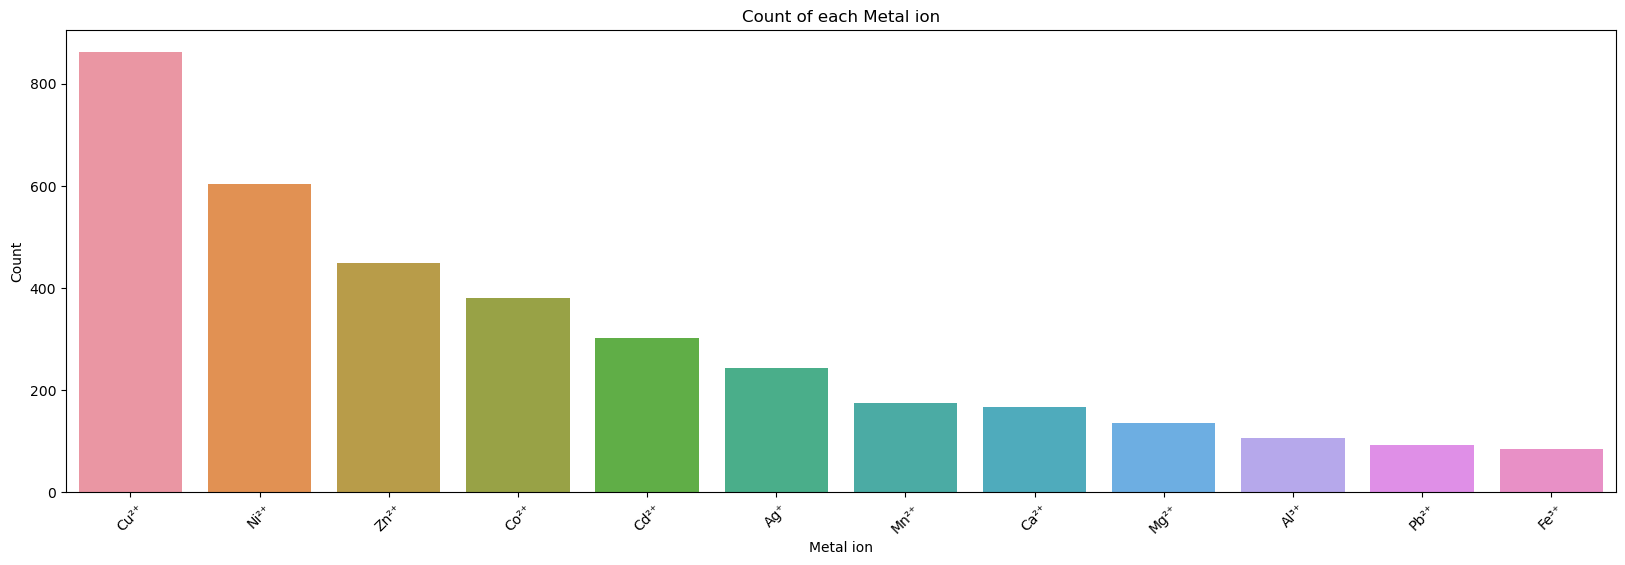

In [5]:
# 計算每個Metal ion的出現次數
ion_counts_f3 = f3_df['Metal ion'].value_counts().reset_index()
ion_counts_f3.columns = ['Metal ion', 'count']
# 使用 Seaborn 畫出 Bar Chart
plt.figure(figsize=(20,6))
sns.barplot(x='Metal ion', y='count', data=ion_counts_f3[:15])
plt.xticks(rotation=45)  # 依需要調整 x 軸文字角度
plt.xlabel('Metal ion')
plt.ylabel('Count')
plt.title('Count of each Metal ion')
plt.show()

In [6]:
ion_counts_f3[:15]

,Metal ion,count
0,Cu²⁺,862
1,Ni²⁺,603
2,Zn²⁺,449
3,Co²⁺,380
4,Cd²⁺,301
5,Ag⁺,243
6,Mn²⁺,175
7,Ca²⁺,166
8,Mg²⁺,136
9,Al³⁺,106


In [7]:
# f0_df = df[df['Metal ion'].isin(top_15_metal_ions)]
# f0_df.shape

# f1_df = f0_df[f0_df['Temperature (C)'] == 25] 
# f1_df.shape

# f2_df = f1_df[f1_df['Ionic strength'] == 0.1]
f3_df.shape
f3_df.to_csv("/work/s6300121/MetalGCN/data/Metal_t15_T25_I0.1_E3.csv", index=False)

In [8]:
# df = pd.read_csv("/work/s6300121/LiveTransForM-main/metal/data/NIST_database_onlyMetal.csv")
df = pd.read_csv("/work/s6300121/MetalGCN/data/Metal_t15_T25_I0.1_E3.csv")
df.rename(columns={'Temperature (C)': 'Temperature', 'Ionic strength': 'Ionic_strength', 'Metal ion': 'metal_ion'}, inplace=True)

# 隨機取10%資料出來用於訓練
df01 = f3_df.sample(frac=0.5)
# 將 Temperature (C) 改成 Temperature, 並將 Ionic strength 改成 Ionic_strength
df01.rename(columns={'Temperature (C)': 'Temperature', 'Ionic strength': 'Ionic_strength', 'Metal ion': 'metal_ion'}, inplace=True)

In [9]:
# 1. 建立一個「上標→正常字元」的對照表
sup_to_normal = {
    '⁰':'0', '¹':'1', '²':'2', '³':'3', '⁴':'4',
    '⁵':'5', '⁶':'6', '⁷':'7', '⁸':'8', '⁹':'9',
    '⁺':'+', '⁻':'-'
}

# 2. 把 dict 轉成可以給 str.translate() 用的 mapping
trans_map = str.maketrans(sup_to_normal)

# # 3. 應用到 metal_ion 欄位
# df['metal_ion_clean'] = df['metal_ion'].str.translate(trans_map)

# 如果你想直接覆蓋原欄位：
df['metal_ion'] = df['metal_ion'].str.translate(trans_map)
df01['metal_ion'] = df01['metal_ion'].str.translate(trans_map)

# print(df[['metal_ion', 'metal_ion_clean']])
# print(df['metal_ion'])

In [10]:
df.to_csv("/work/s6300121/MetalGCN/data/Metal_t15_T25_I0.1_E3.csv", index=False)
df01.to_csv("/work/s6300121/MetalGCN/data/Metal_t15_T25_I0.1_E3_50.csv", index=False)

In [11]:
df01.shape

(1799, 11)

In [13]:
# 檢視/work/s6300121/LiveTransForM-main/metal/output/Metal/Metal_pka_mapping_results.csv檔案中pka_value擁有值的數量
df_pka = pd.read_csv("/work/s6300121/MetalGCN/data/Metal_pka_mapping_results.csv")

# 檢查pka_values欄位非空值的數量
non_empty_pka = df_pka[df_pka['pka_values'].notna() & (df_pka['pka_values'] != '[]')]
print(f"pka_values欄位擁有值的數量: {len(non_empty_pka)}")

# 顯示前幾筆有pka值的資料
print("\n前5筆有pka值的資料:")
print(non_empty_pka[['smiles', 'pka_values']].head())

# 分析pka值的分佈情況
if len(non_empty_pka) > 0:
    # 將字串形式的pka_values轉換為實際數值列表
    import ast
    
    # 嘗試將字串轉換為列表，若失敗則保留原始值
    def parse_pka_values(pka_str):
        try:
            return ast.literal_eval(pka_str)
        except:
            return pka_str
    
    non_empty_pka['parsed_pka'] = non_empty_pka['pka_values'].apply(parse_pka_values)
    
    # 計算每個分子有多少個pka值
    non_empty_pka['pka_count'] = non_empty_pka['parsed_pka'].apply(lambda x: len(x) if isinstance(x, list) else 1)
    
    # 顯示pka值數量的分佈
    print("\npKa值數量分佈:")
    print(non_empty_pka['pka_count'].value_counts())



pka_values欄位擁有值的數量: 2030

前5筆有pka值的資料:
                                              smiles pka_values
0     C(CN(Cc1ccccn1)Cc2ccccn2)N(Cc3ccccn3)Cc4ccccn4    [11.06]
1                                  C1CNCCSCCOCCSCCN1      [9.9]
2                                 C1N2CN3CN1CN(C2)C3     [3.49]
3                                CCCCC(C(O)=O)C(O)=O     [0.74]
4  CCCCCCCCCCCCCC(=O)O[C@@H]1[C@@H](C)[C@@]2(O)[C...     [7.71]

pKa值數量分佈:
1    1541
2     480
3       9
Name: pka_count, dtype: int64
